## 기획배경: 

앨리스코딩에서 배운 내용들을 바탕으로 서울 마포구 망원동 주민으로써, 공공데이터를 활용해서 주변 병원을 찾을 수 있는지 알아보고자 시작한 프로젝트

## 프로젝트 구성 : 

     
**<데이터 다운로드>** 
   
공공데이터 포털에서 소상공인시장진흥공단_상가업소정보_의료기관_201909.csv'파일을 다운 받는다.   

**<데이터 기본정보 확인 및 정제>**   
   
데이터의 기본 정보, 결측치를 확인, 칼럼 정리.   

**<데이터 분석 및 원하는 결론 도출>** 
    
시,구,동 별로 분석. 마포구 망원동 내 병원 찾기.   

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('소상공인시장진흥공단_상가업소정보_의료기관_201909.csv')

C:\Users\cityo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.shape

(91335, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

## 한글화 코드

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family']='Malgun Gothic'  # Windows
# plt.style.use("seaborn-pastel")
plt.style.use("fivethirtyeight")

In [7]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


# 결측치 시각화

In [8]:
import missingno

<AxesSubplot:>

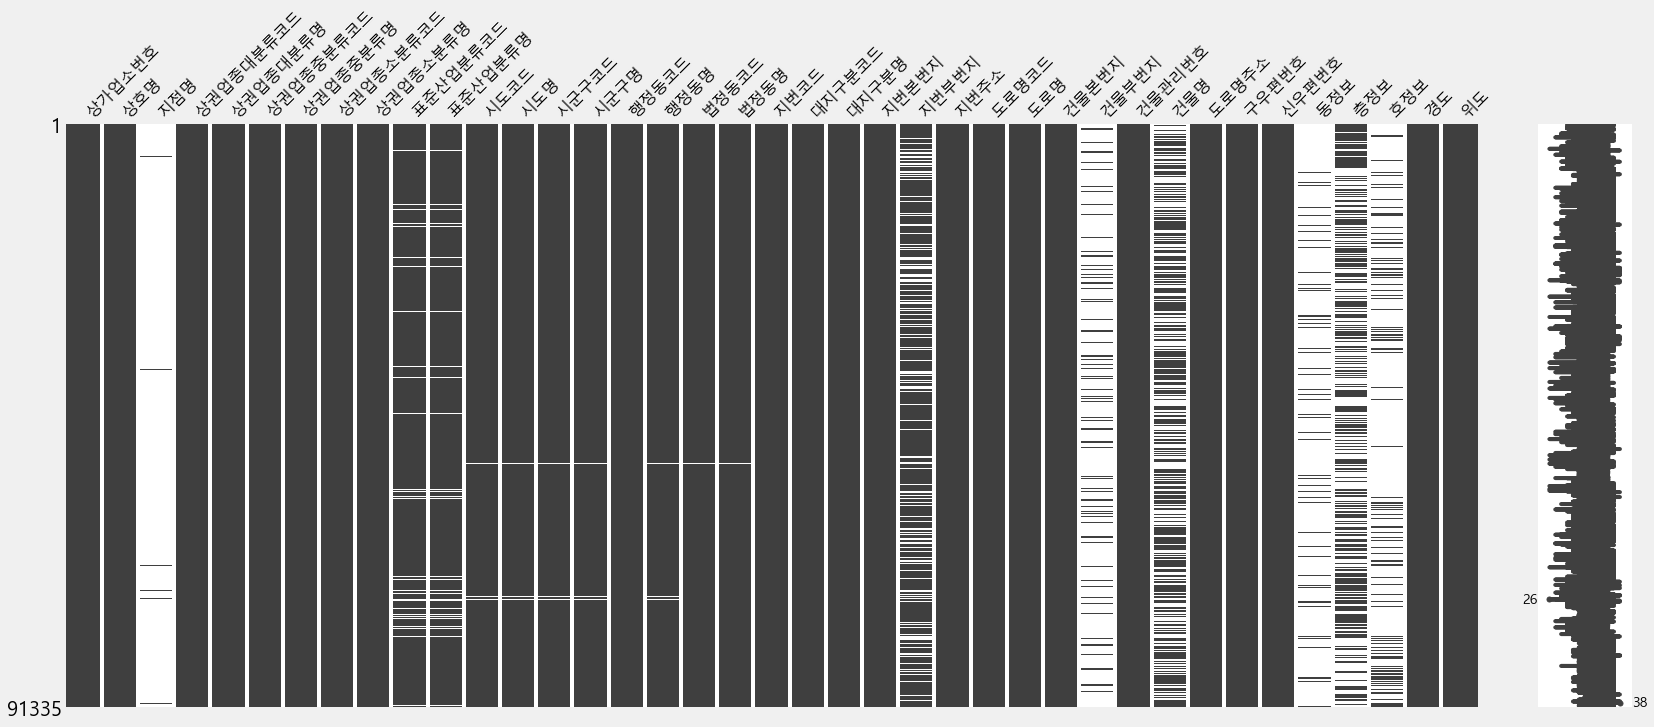

In [9]:
missingno.matrix(df)

<AxesSubplot:>

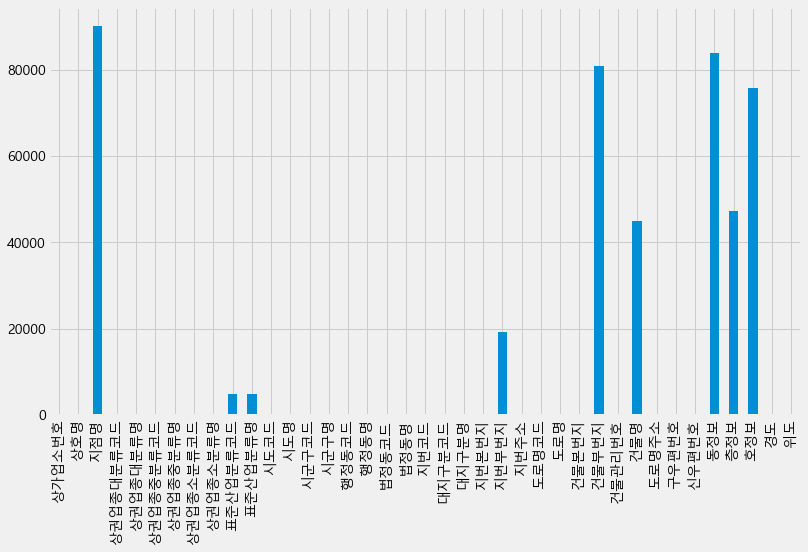

In [10]:
plt.figure(figsize=(12,7))
df.isnull().sum().plot.bar()

### 결측치가 골고루 많다.

<AxesSubplot:ylabel='None'>

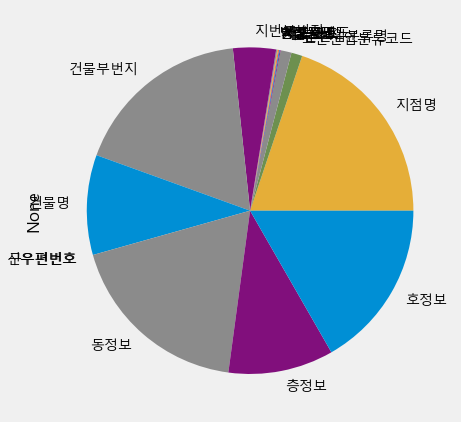

In [11]:
df.isnull().sum()
plt.figure(figsize=(7,7))
df.isnull().sum().plot.pie()

결측치를 제거하면서 동시에 같은 행들의 중요한 정보가 사라지기 때문에, 우선 냅두고 진행한다.

In [12]:
# df.head(1)
# df.drop(['건물본번지','건물부번지','건물관리번호','구우편번호'],axis=1,inplace=True)

## 필요없는 칼럼 정리

In [13]:
df=df[['상호명','지점명','상권업종대분류코드','상권업종대분류명','상권업종중분류코드','표준산업분류명','시도명','시군구명','행정동명','법정동명','도로명주소','건물명','위도','경도']]

In [14]:
df.head()

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,표준산업분류명,시도명,시군구명,행정동명,법정동명,도로명주소,건물명,위도,경도
0,하나산부인과,NaN,S,의료,S01,일반 의원,경기도,안산시 단원구,선부3동,선부동,경기도 안산시 단원구 달미로 10,산호한양아파트,37.336344,126.814295
1,타워광명내과의원,NaN,S,의료,S01,일반 의원,서울특별시,강남구,도곡2동,도곡동,서울특별시 강남구 언주로30길 39,NaN,37.488742,127.053198
2,조정현신경외과의원,NaN,S,의료,S01,일반 의원,경기도,시흥시,정왕1동,정왕동,경기도 시흥시 중심상가로 178,한라프라자,37.344955,126.734841
3,한귀원정신과의원,NaN,S,의료,S01,NaN,부산광역시,수영구,광안3동,광안동,부산광역시 수영구 수영로 688,NaN,35.166872,129.115438
4,더블유스토어수지점,수지점,S,의료,S02,의약품 및 의료용품 소매업,경기도,용인시 수지구,풍덕천1동,풍덕천동,경기도 용인시 수지구 문정로 32,NaN,37.323528,127.095522


## 기초 분석

<AxesSubplot:>

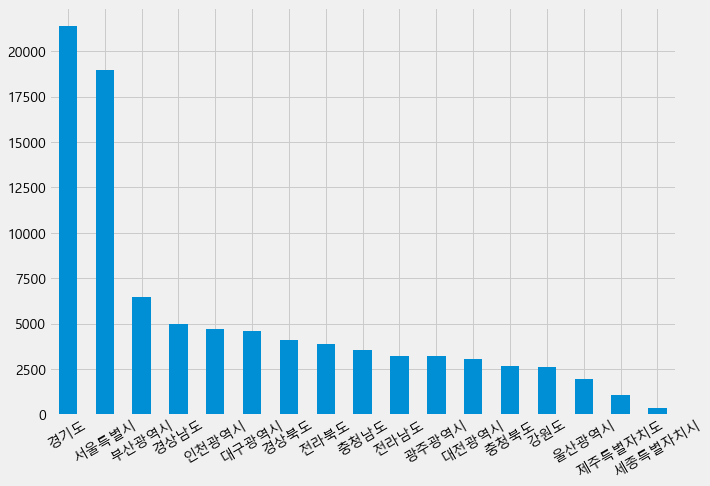

In [15]:
df['시도명'].unique()
plt.figure(figsize=(10,7))
df['시도명'].value_counts(ascending=False).plot.bar(rot=30)

In [16]:
import seaborn as sns

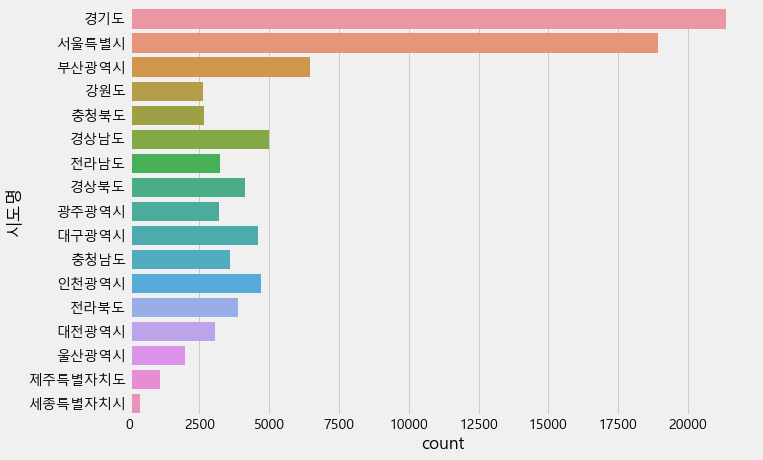

In [17]:
#seaborn ,sns
plt.figure(figsize=(10,7))
c= sns.countplot(data=df, y='시도명' ) #변수명으로 담아주면 설명이 출력 안됌

In [18]:
df_seoul=df[df['시도명']=='서울특별시']
df_seoul.head()

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,표준산업분류명,시도명,시군구명,행정동명,법정동명,도로명주소,건물명,위도,경도
1,타워광명내과의원,NaN,S,의료,S01,일반 의원,서울특별시,강남구,도곡2동,도곡동,서울특별시 강남구 언주로30길 39,NaN,37.488742,127.053198
8,코원성형외과,NaN,S,의료,S01,일반 의원,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 논현로 826,이가빌딩,37.522223,127.028531
9,헬로스마일소아과,NaN,S,의료,S01,일반 의원,서울특별시,강남구,논현1동,논현동,서울특별시 강남구 논현로131길 30,성도빌딩,37.514144,127.027878
31,고운나라성형외과,NaN,S,의료,S01,일반 의원,서울특별시,강동구,성내2동,성내동,서울특별시 강동구 천호대로 1032,NaN,37.537333,127.126507
33,이즈타워약,NaN,S,의료,S02,의약품 및 의료용품 소매업,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 테헤란로 101,이즈타워,37.498656,127.028023


## 강남구가 의료업이 제일 많다

<AxesSubplot:xlabel='시군구명', ylabel='count'>

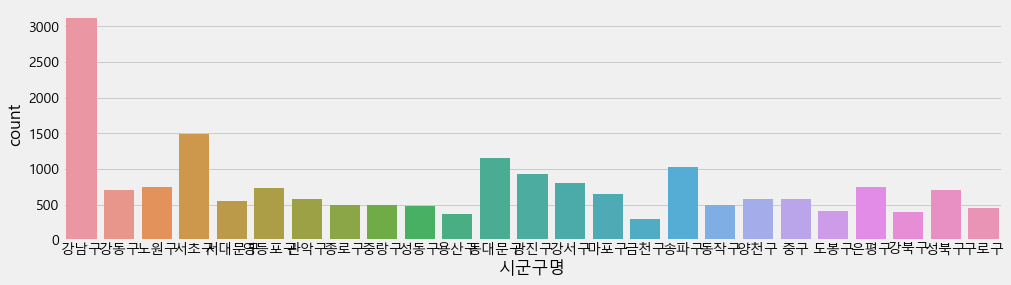

In [19]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul, x='시군구명')

## 강남구를 더 알아보자.

### 강남구 법정동 당 의료업 수 시각화

<AxesSubplot:xlabel='법정동명', ylabel='count'>

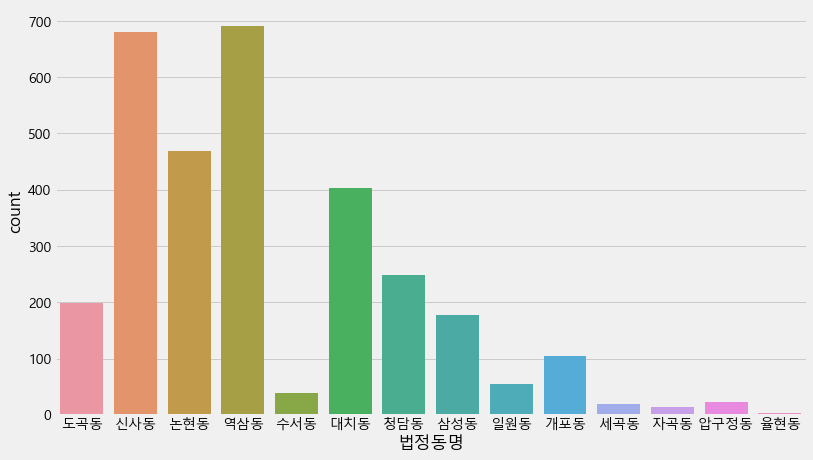

In [20]:
df_gang=df_seoul[df_seoul['시군구명']=='강남구']
plt.figure(figsize=(12,7))
sns.countplot(data=df_gang, x='법정동명')

### 행정동명 당 산업분류를 알아보기 위해 
### 병원 수가 가장 많은 순으로 TOP3 추출

In [21]:
df_gang2=df_gang[df_gang['행정동명'].isin(['역삼1동','압구정동','신사동'])]
df_gang2.head(3)

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,표준산업분류명,시도명,시군구명,행정동명,법정동명,도로명주소,건물명,위도,경도
8,코원성형외과,NaN,S,의료,S01,일반 의원,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 논현로 826,이가빌딩,37.522223,127.028531
33,이즈타워약,NaN,S,의료,S02,의약품 및 의료용품 소매업,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 테헤란로 101,이즈타워,37.498656,127.028023
49,오리진,NaN,S,의료,S01,일반 병원,서울특별시,강남구,신사동,신사동,서울특별시 강남구 논현로167길 15,NaN,37.524434,127.026817


### 산업분류 TOP3 추출

In [22]:
df_gang3=df_gang2[df_gang2['표준산업분류명'].isin(['일반 의원','치과 의원','의약품 및 의료용품 소매업'])]
df_gang3.head(3)
df_gang3['표준산업분류명'].nunique()

3

## 비교 및 시각화

Text(0, 0.5, '산업유형')

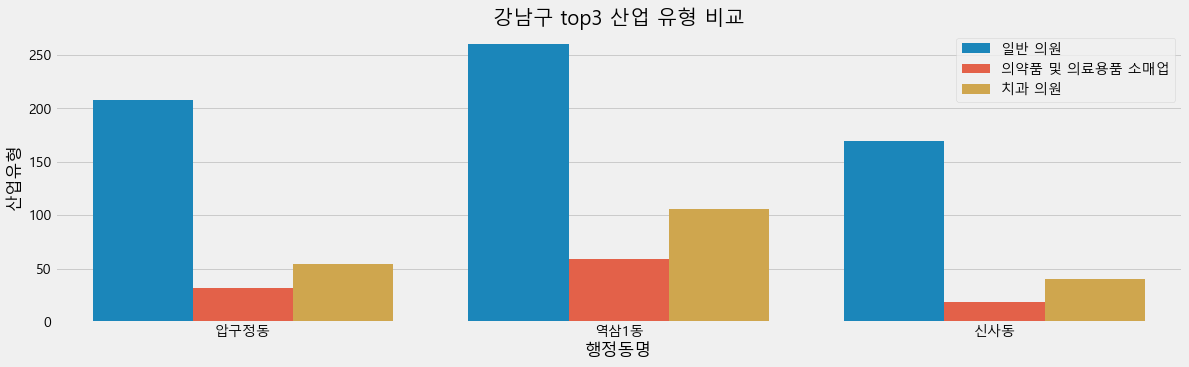

In [23]:
plt.figure(figsize=[18,5])
sns.countplot(data=df_gang3, x='행정동명', hue='표준산업분류명')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1))
plt.title('강남구 top3 산업 유형 비교')
plt.xlabel('행정동명')
plt.ylabel('산업유형')

## 강남구 Sample 추출해서 위치 Scatterplot

In [24]:
df_s_sample=df_gang.sample(n=500)

<AxesSubplot:xlabel='경도', ylabel='위도'>

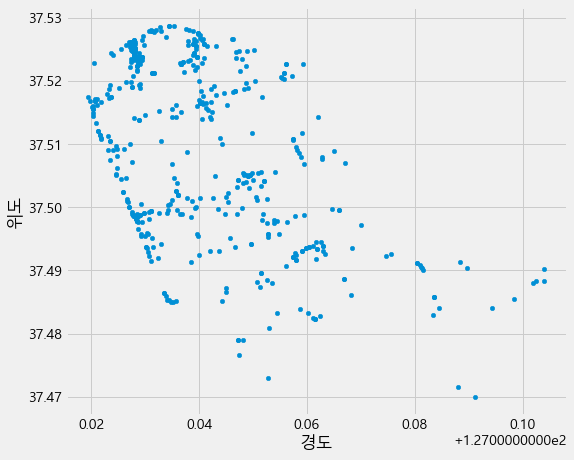

In [25]:
# pandas의 plot.scatter를 통해 경도와 위도를 표시
df_s_sample[['경도','위도','시군구명']].plot.scatter(x='경도',y='위도',figsize=(8,7),grid=True)

# 마포구 중에서 망원동 데이터만 뽑아내기

In [26]:
df_seoul.shape
df_seoul=df_seoul[(df_seoul['시군구명']=='마포구') & 
         
         
         (df_seoul['법정동명']=='망원동')]

In [27]:
df_seoul.head()
df_seoul=df_seoul[df_seoul['상권업종대분류명']=='의료']

In [28]:
df_seoul.head(3)

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,표준산업분류명,시도명,시군구명,행정동명,법정동명,도로명주소,건물명,위도,경도
7841,늘푸른한약국,NaN,S,의료,S02,의약품 및 의료용품 소매업,서울특별시,마포구,망원1동,망원동,서울특별시 마포구 희우정로21길 9,NaN,37.555025,126.899547
9023,영진약국,NaN,S,의료,S02,의약품 및 의료용품 소매업,서울특별시,마포구,망원1동,망원동,서울특별시 마포구 망원로8길 67,NaN,37.554553,126.906039
16076,서교동물병원,NaN,S,의료,S04,수의업,서울특별시,마포구,망원1동,망원동,서울특별시 마포구 포은로 105-1,NaN,37.556468,126.904573


In [29]:
df_seoul.shape

(47, 14)

## 의료업 시각화

In [30]:
import folium
df_seoul['위도'].mean() #위도의 평균값
df_seoul['경도'].mean() #경도

126.9068138470197

In [31]:
import folium
map=folium.Map(location=[df_seoul['위도'].mean(),df_seoul['경도'].mean()],zoom_start=15)


for n in df_seoul.index:
#     name=df_route_p.loc[n,'_']
    
    location=[df_seoul.loc[n,'위도'], df_seoul.loc[n,'경도']]
#     adress=df_sample.loc[n,'구']
#     popup=f'{name}-{adress}'

    folium.Marker(
        location = location,
        icon=folium.Icon(color = 'green')
#         popup = popup,
    ).add_to(map)
map

In [32]:
df_seoul['표준산업분류명'].unique()

array(['의약품 및 의료용품 소매업', '수의업', '한의원', '일반 의원', '치과 의원', '일반 병원', nan,
       '개인 간병인 및 유사 서비스업', '정형외과용 및 신체보정용 기기 제조업'], dtype=object)

## 의료업 중에서 병원만 찾기

In [33]:
df_hospital=df_seoul[(df_seoul['표준산업분류명'] == '일반 의원')|(df_seoul['표준산업분류명'] =='치과 의원')|(df_seoul['표준산업분류명'] =='일반 병원')]

In [34]:
df_hospital.shape

(18, 14)

In [35]:
df_hospital.head(1)
df_hospital.drop(columns=['지점명','건물명','상권업종대분류코드'],axis=1,inplace=True)

C:\Users\cityo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
df_hospital.head(1)
df_hospital.shape # 총 18개

(18, 11)

## 병원 위치 시각화

In [37]:
import folium
df_hospital['위도'].mean() #위도의 평균값
df_hospital['경도'].mean() #경도

126.90761676231756

In [38]:
import folium
map=folium.Map(location=[df_hospital['위도'].mean(),df_hospital['경도'].mean()],zoom_start=16)


for n in df_hospital.index:
#     name=df_route_p.loc[n,'_']
    
    location=[df_hospital.loc[n,'위도'], df_hospital.loc[n,'경도']]
#     adress=df_sample.loc[n,'구']
#     popup=f'{name}-{adress}'

    folium.Marker(
        location = location,
        icon=folium.Icon(color = 'red')
#         popup = popup,
    ).add_to(map)
map

# + 망원역으로부터 1Km 내 병원찾기

**WGS84 좌표 기반 데이터 집계 및 시각화**


https://wooiljeong.github.io/python/count_by_wgs84/

참고해서 진행했습니다.

필요한 라이브러리 불러오기

In [39]:
from geopy.distance import great_circle
import pandas as pd
import folium

In [40]:
lat=37.55613581957871
lon= 126.91009420161011
dist=1

## CountByWGS84 클래스 정의

In [41]:
from geopy.distance import great_circle
import pandas as pd
import folium

class CountByWGS84:

    def __init__(self, df, lat, lon, dist=1):
        """
        df: 데이터 프레임
        lat: 중심 위도
        lon: 중심 경도
        dist: 기준 거리(km)
        """
        self.df = df
        self.lat = lat
        self.lon = lon
        self.dist = dist

    def filter_by_rectangle(self):
        """
        사각 범위 내 데이터 필터링
        """
        lat_min = self.lat - 0.01 * self.dist
        lat_max = self.lat + 0.01 * self.dist

        lon_min = self.lon - 0.015 * self.dist
        lon_max = self.lon + 0.015 * self.dist

        self.points = [[lat_min, lon_min], [lat_max, lon_max]]

        result = self.df.loc[
            (self.df['lat'] > lat_min) &
            (self.df['lat'] < lat_max) &
            (self.df['lon'] > lon_min) &
            (self.df['lon'] < lon_max)
        ]
        result.index = range(len(result))

        return result

    def filter_by_radius(self):
        """
        반경 범위 내 데이터 필터링
        """
        # 사각 범위 내 데이터 필터링
        tmp = self.filter_by_rectangle()

        # 기준 좌표 포인트
        center = (self.lat, self.lon)

        result = pd.DataFrame()
        for index, row in tmp.iterrows():
            # 개별 좌표 포인트
            point = (row['lat'], row['lon'])
            d = great_circle(center, point).kilometers
            if d <= self.dist:
                result = pd.concat([result, tmp.iloc[index, :].to_frame().T])

        result.index = range(len(result))

        return result

    def plot_by_rectangle(self, df):
        """
        사각 범위 내 데이터 플로팅
        """

        m = folium.Map(location=[self.lat, self.lon], zoom_start=14)

        for idx, row in df.iterrows():

            lat_ = row['lat']
            lon_ = row['lon']

            folium.Marker(location=[lat_, lon_],
                          radius=15,
                         ).add_to(m)

        folium.Rectangle(bounds=self.points,
                         color='#ff7800',
                         fill=True,
                         fill_color='#ffff00',
                         fill_opacity=0.2).add_to(m)

        return m

    def plot_by_radius(self, df):
        """
        반경 범위 내 데이터 플로팅
        """

        m = folium.Map(location=[self.lat, self.lon], zoom_start=14)

        for idx, row in df.iterrows():

            lat_ = row['lat']
            lon_ = row['lon']

            folium.Marker(location=[lat_, lon_],
                          radius=15,
                          tooltip=row['lat']).add_to(m)

        folium.CircleMarker(radius=dist*100,
                      location=[lat, lon],
                      color="#ff7800",
                      fill_color='#ffff00',
                      fill_opacity=0.2
                      ).add_to(m)

        return m

## 시각화에 필요 부분 전처리

In [42]:
df=df_hospital.rename(columns={'위도':'lat','경도':'lon'}).copy()

In [43]:
df=df[['lat','lon']]

In [44]:
df.index = range(len(df))

In [45]:
df.head(1)

,lat,lon
0,37.555619,126.910143


In [46]:
# 반경 집계 인스턴스 생성
cbw = CountByWGS84(df, lat, lon, dist)

# result = cbw.filter_by_radius()
# cbw.filter_by_radius(result)

In [47]:
# 사각 범위 내 데이터 필터링
result_rectangle = cbw.filter_by_rectangle()

# 반경 범위 내 데이터 필터링
result_radius = cbw.filter_by_radius()

print(f"""
{"="*50}
중심 위도: {cbw.lat}
중심 경도: {cbw.lon}
기준 거리: {cbw.dist} km
사각 범위 내 데이터 필터링 결과: {len(result_rectangle):,} 건
반경 범위 내 데이터 필터링 결과: {len(result_radius):,} 건
{"="*50}
""")


중심 위도: 37.55613581957871
중심 경도: 126.91009420161011
기준 거리: 1 km
사각 범위 내 데이터 필터링 결과: 18 건
반경 범위 내 데이터 필터링 결과: 18 건



## 망원역 1km 내 병원은 18곳이다

In [48]:
result_radius.head(1)

,lat,lon
0,37.555619,126.910143


# 시각화

In [49]:
plot_2 = cbw.plot_by_radius(result_radius)
plot_2